 # Project Overview
 ## Objective:
 ● Analyze daily financial transactions to identify trends, patterns, and insights.
 
 ● Generate a comprehensive report with visualizations.
 ## Dataset Description
 ● Date: Date of the transaction.
 
 ● Transaction_ID: Unique identifier for each transaction.
 
 ● Account_ID: Unique identifier for the account.
 
 ● Category: Category of the transaction (e.g., Sales, Purchase, Salary).
 
 ● Amount: Amount of money involved in the transaction.
 
 ● Type: Type of transaction (Credit or Debit).

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

# Loading DataSet

In [3]:
df=pd.read_csv("C://Users//alokm//Downloads//Daily Household Transactions.csv")
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


# Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [31]:
df['Date']=pd.to_datetime(df['Date'],errors="coerce")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1303 non-null   datetime64[ns]
 1   Mode            2461 non-null   object        
 2   Category        2461 non-null   object        
 3   Subcategory     1826 non-null   object        
 4   Note            1940 non-null   object        
 5   Amount          2461 non-null   float64       
 6   Income/Expense  2461 non-null   object        
 7   Currency        2461 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 153.9+ KB


In [65]:
df.isnull().sum()

Date              754
Mode                0
Category            0
Subcategory       447
Note              253
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [57]:
df.drop_duplicates(inplace=True)

# ExploratoryDataAnalysis(EDA)
     ● Summarystatistics.
 
     ● Distributionof transactionamounts.
 
     ● Transactioncountsbycategoryandtype

In [144]:
 df["Mode"].value_counts()

Mode
Cash                     982
Saving Bank account 1    895
Credit Card              160
Share Market Trading       5
Saving Bank account 2      5
Recurring Deposit          3
Debit Card                 2
Equity Mutual Fund B       1
Equity Mutual Fund C       1
Equity Mutual Fund A       1
Equity Mutual Fund D       1
Fixed Deposit              1
Name: count, dtype: int64

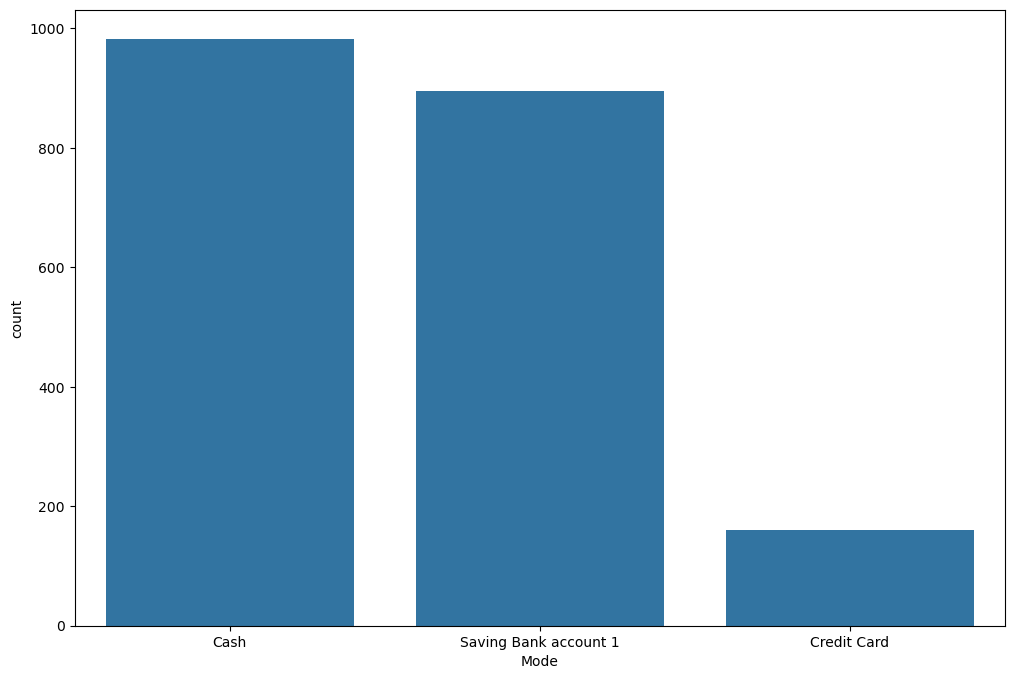

In [146]:
 plt.figure(figsize = (12,8))
 sns.countplot(data = df, x = "Mode", order =
 df["Mode"].value_counts().iloc[:3].index)
 plt.show()


In [148]:
 df["Category"].value_counts()

Category
Food                         841
Transportation               290
Household                    175
Other                        124
subscription                 109
Health                        94
Family                        65
Apparel                       47
Salary                        43
Gift                          30
Beauty                        21
Education                     18
Money transfer                17
Festivals                     16
Gpay Reward                   14
Investment                    14
Dividend earned on Shares     12
Interest                      12
maid                          11
Culture                       11
Share Market                   8
Maturity amount                7
Saving Bank account 1          7
Public Provident Fund          6
Bonus                          6
Petty cash                     6
Tourism                        5
Grooming                       4
Recurring Deposit              4
Cook                           3
R

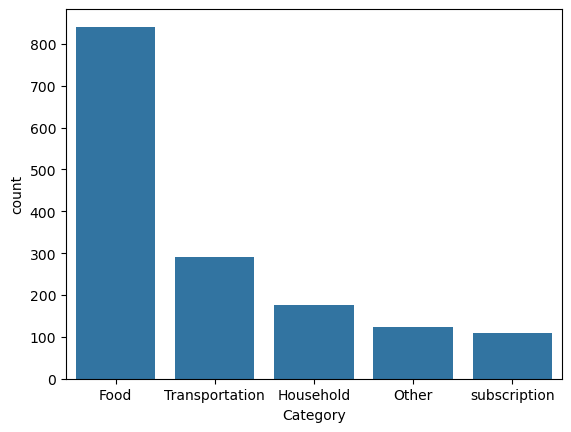

In [150]:
sns.countplot(data = df, x = "Category", order =
df["Category"].value_counts().iloc[:5].index);

In [152]:
df["Subcategory"].unique()

array(['Train', 'snacks', 'Netflix', 'Mobile Service Provider',
       'Ganesh Pujan', 'Tata Sky', 'auto', nan, 'Grocery', 'Lunch',
       'Milk', 'Pocket money', 'Laundry', 'breakfast', 'Dinner', 'Sweets',
       'Kirana', 'Ice cream', 'curd', 'Biscuits', 'Rajgira ladu',
       'Navratri', 'train', 'Tea', 'flour mill', 'Appliances',
       'home decor', 'grooming', 'Health', 'Clothing', 'clothes', 'Home',
       'chocolate', 'Medicine', 'Eating out', 'Movie', 'vegetables',
       'fruits', 'Potato', 'Onions', 'Taxi', 'Hardware', 'Eggs', 'Bread',
       'Petrol', 'Hospital', 'Mahanagar Gas', 'Lab Tests', 'Bus',
       'Travels', 'Kitchen', 'Footwear', 'Entry Fees', 'gadgets',
       'Accessories', 'misc', 'Stationary', 'Newspaper', 'Toiletries',
       'Bike', 'beverage', 'makeup', 'Books', 'Holi', 'Courier',
       'Leisure', 'Updation', 'Amazon Prime', 'Edtech Course', 'Hotstar',
       'Diwali', 'Wifi Internet Service', 'Trip', 'Furniture', 'Water',
       'Cable TV', 'medicine', 'M

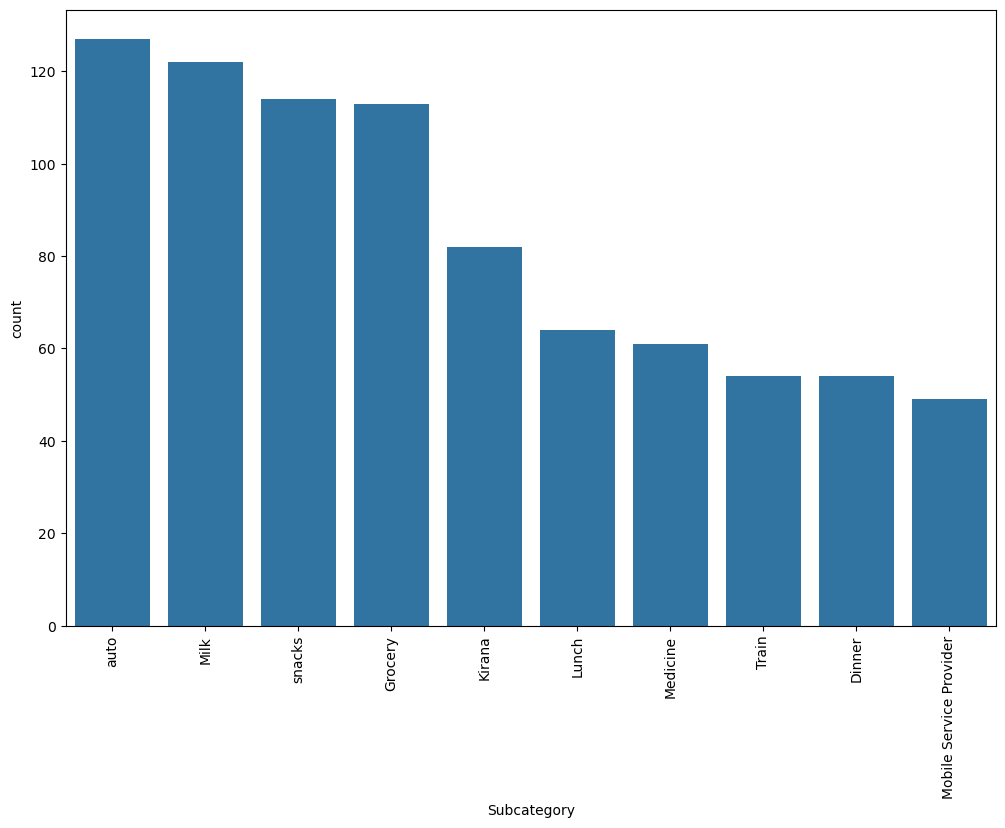

In [154]:
 plt.figure(figsize=(12,8))
 sns.countplot(data=df,x="Subcategory",order=
 df["Subcategory"].value_counts().iloc[:10].index)
 plt.xticks(rotation=90)
 plt.show()


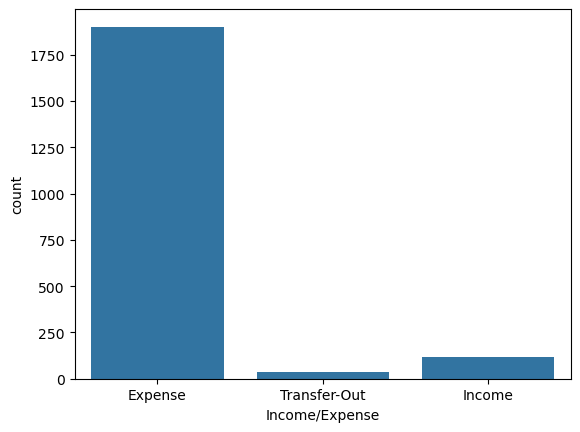

In [156]:
 sns.countplot(data = df, x = "Income/Expense");


In [158]:
 df["Note"].nunique()

1057

In [160]:
df["Currency"].value_counts()

Currency
INR    2057
Name: count, dtype: int64

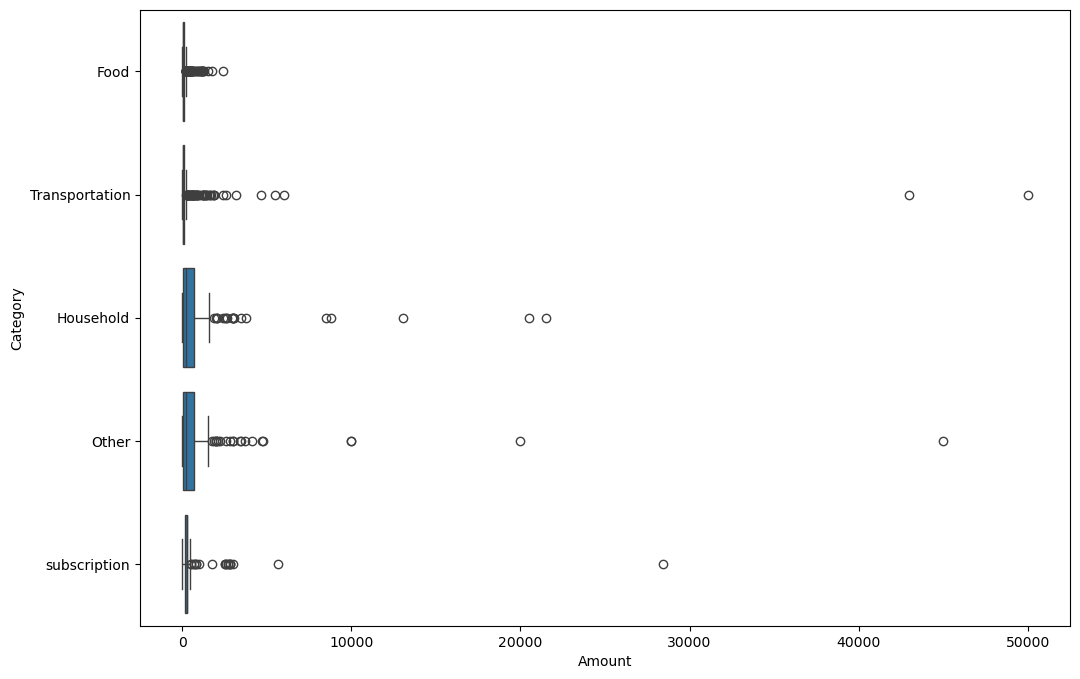

In [162]:
 plt.figure(figsize = (12,8))
 sns.boxplot(data = df, x = "Amount", y = "Category", order =
 df["Category"].value_counts().iloc[:5].index)
 plt.show()

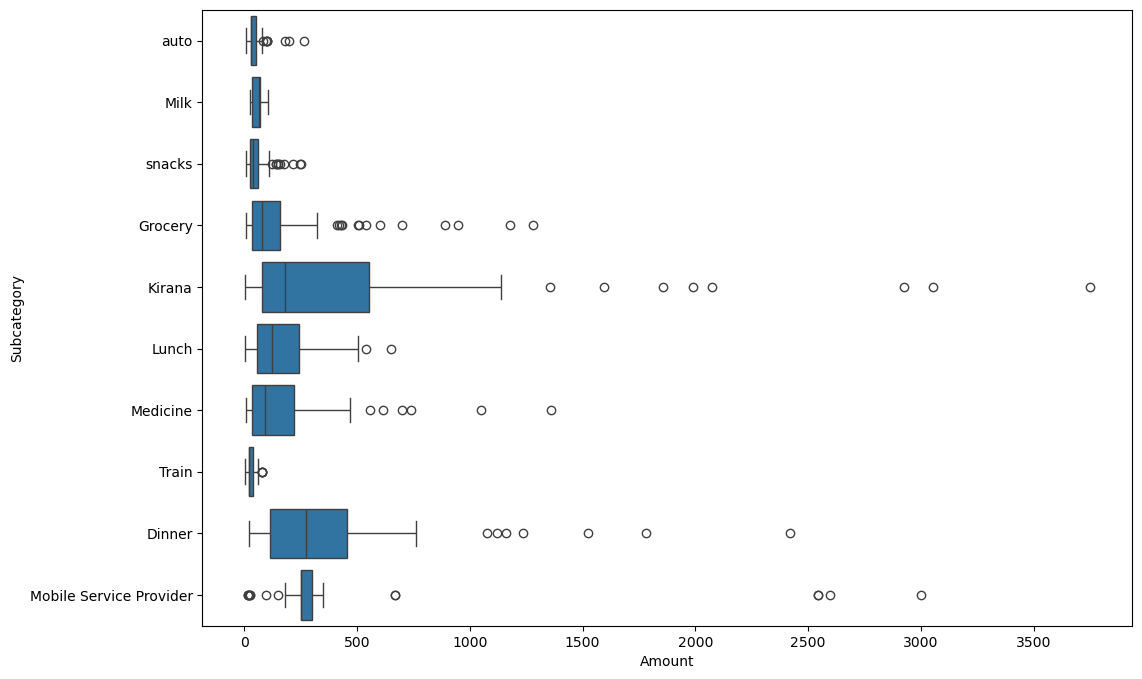

In [166]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = "Amount", y = "Subcategory", order =
df["Subcategory"].value_counts().iloc[:10].index, )
plt.show()

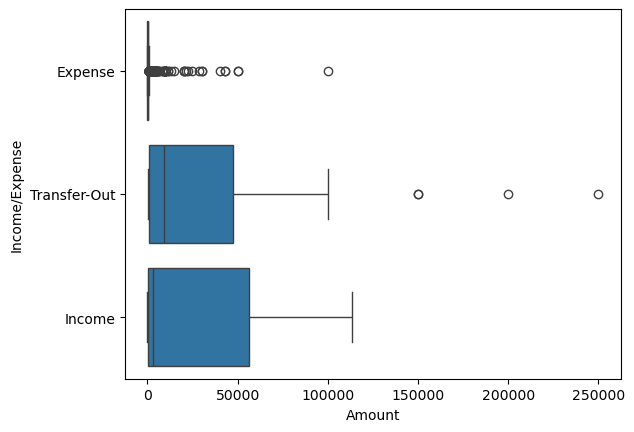

In [168]:
sns.boxplot(data = df, x = "Amount", y = "Income/Expense");


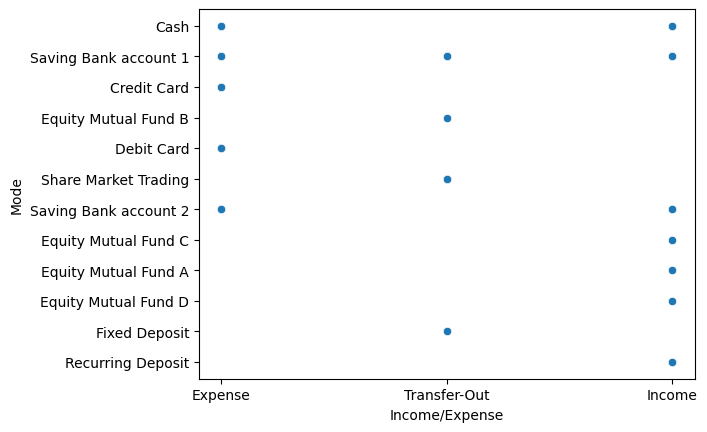

In [170]:
 sns.scatterplot(data = df,x = "Income/Expense", y = "Mode",);


In [67]:
df.describe()

,Date,Amount
count,1303,2057.000000
mean,2017-05-12 20:41:38.546431232,2791.281176
min,2015-01-13 18:52:47,2.000000
25%,2016-12-18 20:18:45.500000,30.000000
50%,2017-07-27 20:05:23,80.000000
75%,2018-01-30 12:09:30.500000,330.000000
max,2018-09-20 12:04:08,250000.000000
std,NaN,13598.659347


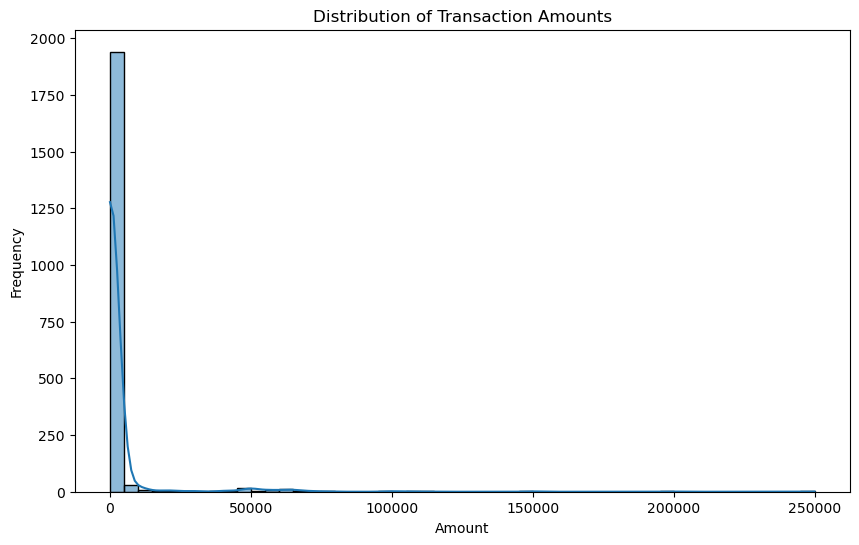

In [72]:
 plt.figure(figsize=(10,6))
 sns.histplot(df['Amount'],bins=50,kde=True)
 plt.title('Distribution of Transaction Amounts')
 plt.xlabel('Amount')
 plt.ylabel('Frequency')
 plt.show()

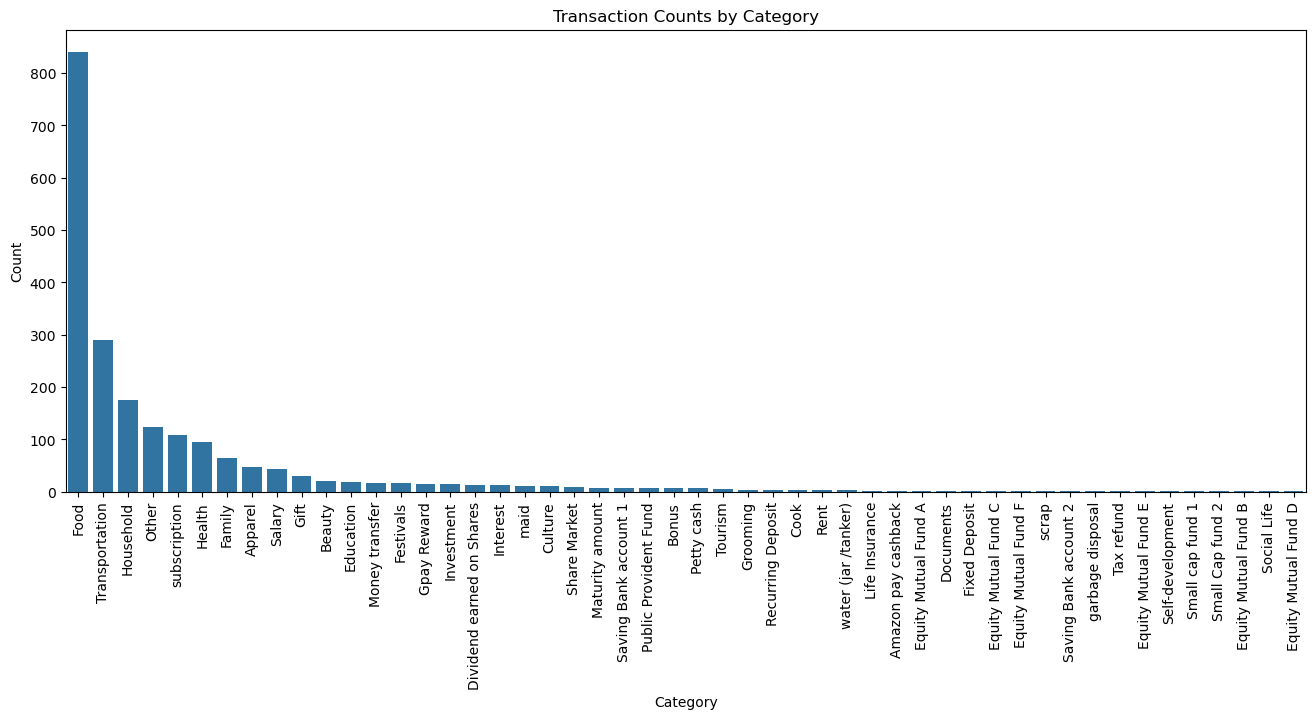

In [112]:
 plt.figure(figsize=(16,6))
 sns.countplot(data=df,x='Category',order=df['Category'].value_counts().index)
 plt.title('Transaction Counts by Category')
plt.xlabel('Category')
 plt.ylabel('Count')
 plt.xticks(rotation=90)
 plt.show()

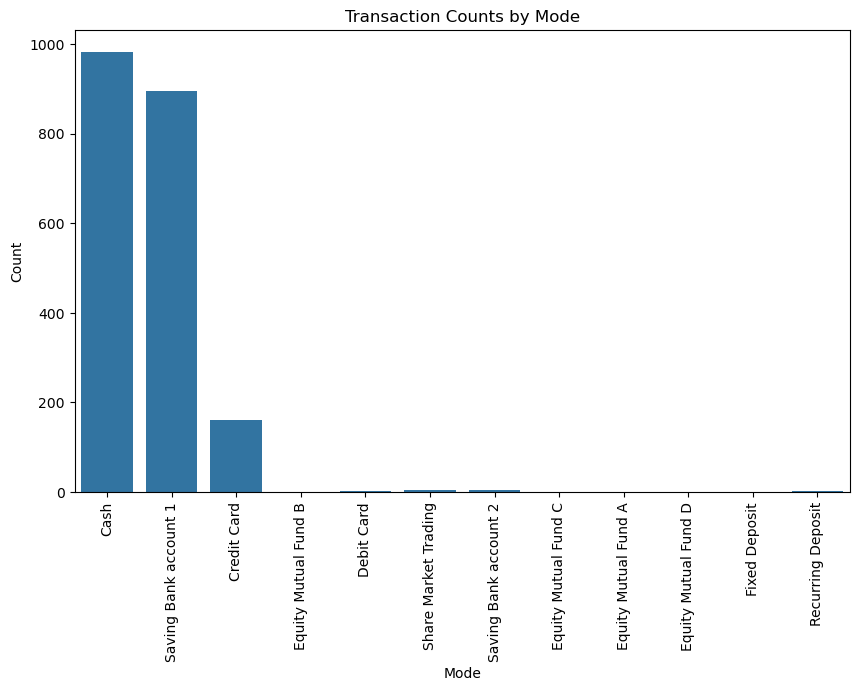

In [190]:
 plt.figure(figsize=(10, 6))
 sns.countplot(data=df,x="Mode")
 plt.title("Transaction Counts by Mode")
 plt.xlabel('Mode')
 plt.ylabel('Count')
 plt.xticks(rotation=90)
 plt.show()

# Time Series Analysis
 ● Trend analysis.

 ● Monthly and daily trends.

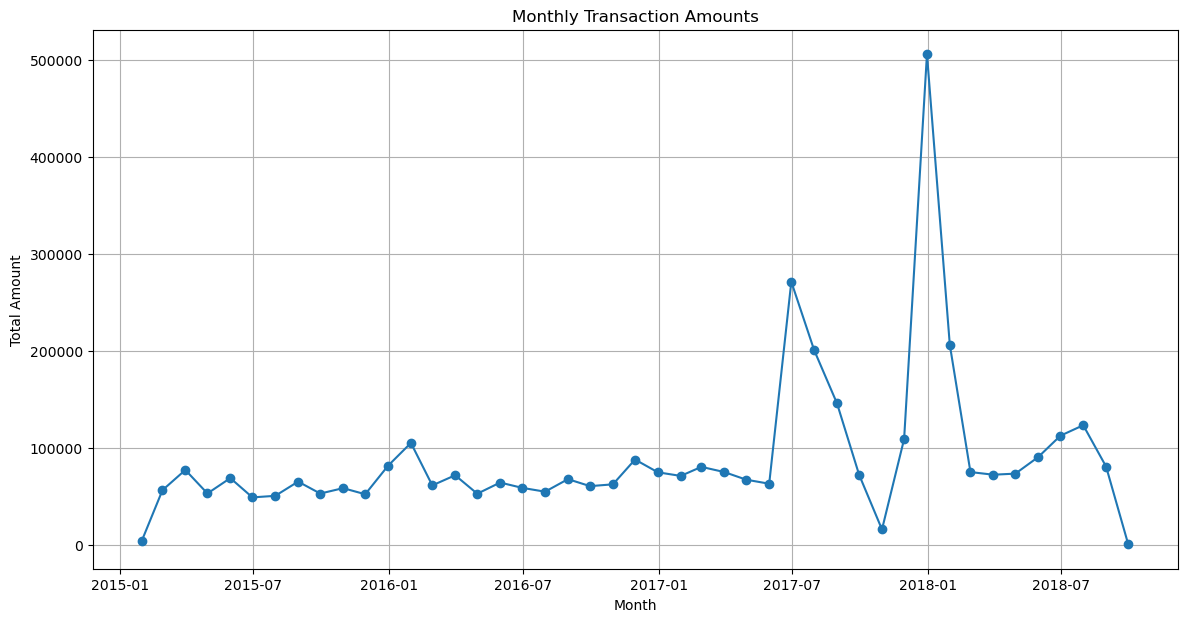

In [192]:
 monthly_data = df.resample('ME', on='Date').sum()
 plt.figure(figsize=(14, 7))
 plt.plot(monthly_data.index, monthly_data['Amount'], marker='o')
 plt.title('Monthly Transaction Amounts')
 plt.xlabel('Month')
 plt.ylabel('Total Amount')
plt.grid(True)
 plt.show()

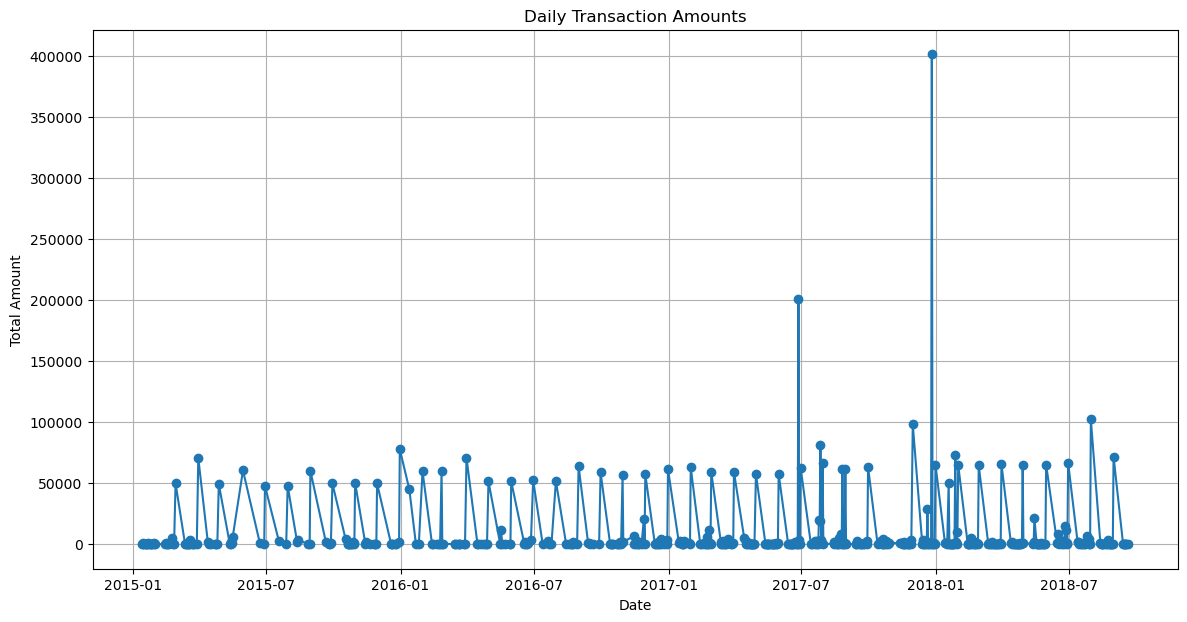

In [194]:
daily_data = df.groupby(df['Date'].dt.date,as_index=True)[["Amount"]].sum(numeric_only=True)
plt.figure(figsize=(14,7))
plt.plot(daily_data.index, daily_data['Amount'], marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

  # Correlation Analysis
 ● Analyze the correlation between transaction categories and amounts

In [132]:
pivot_table = df.pivot_table(index='Date', columns='Category', values='Amount',
 aggfunc='sum', fill_value=0)

In [134]:
 correlation_matrix = pivot_table.corr()

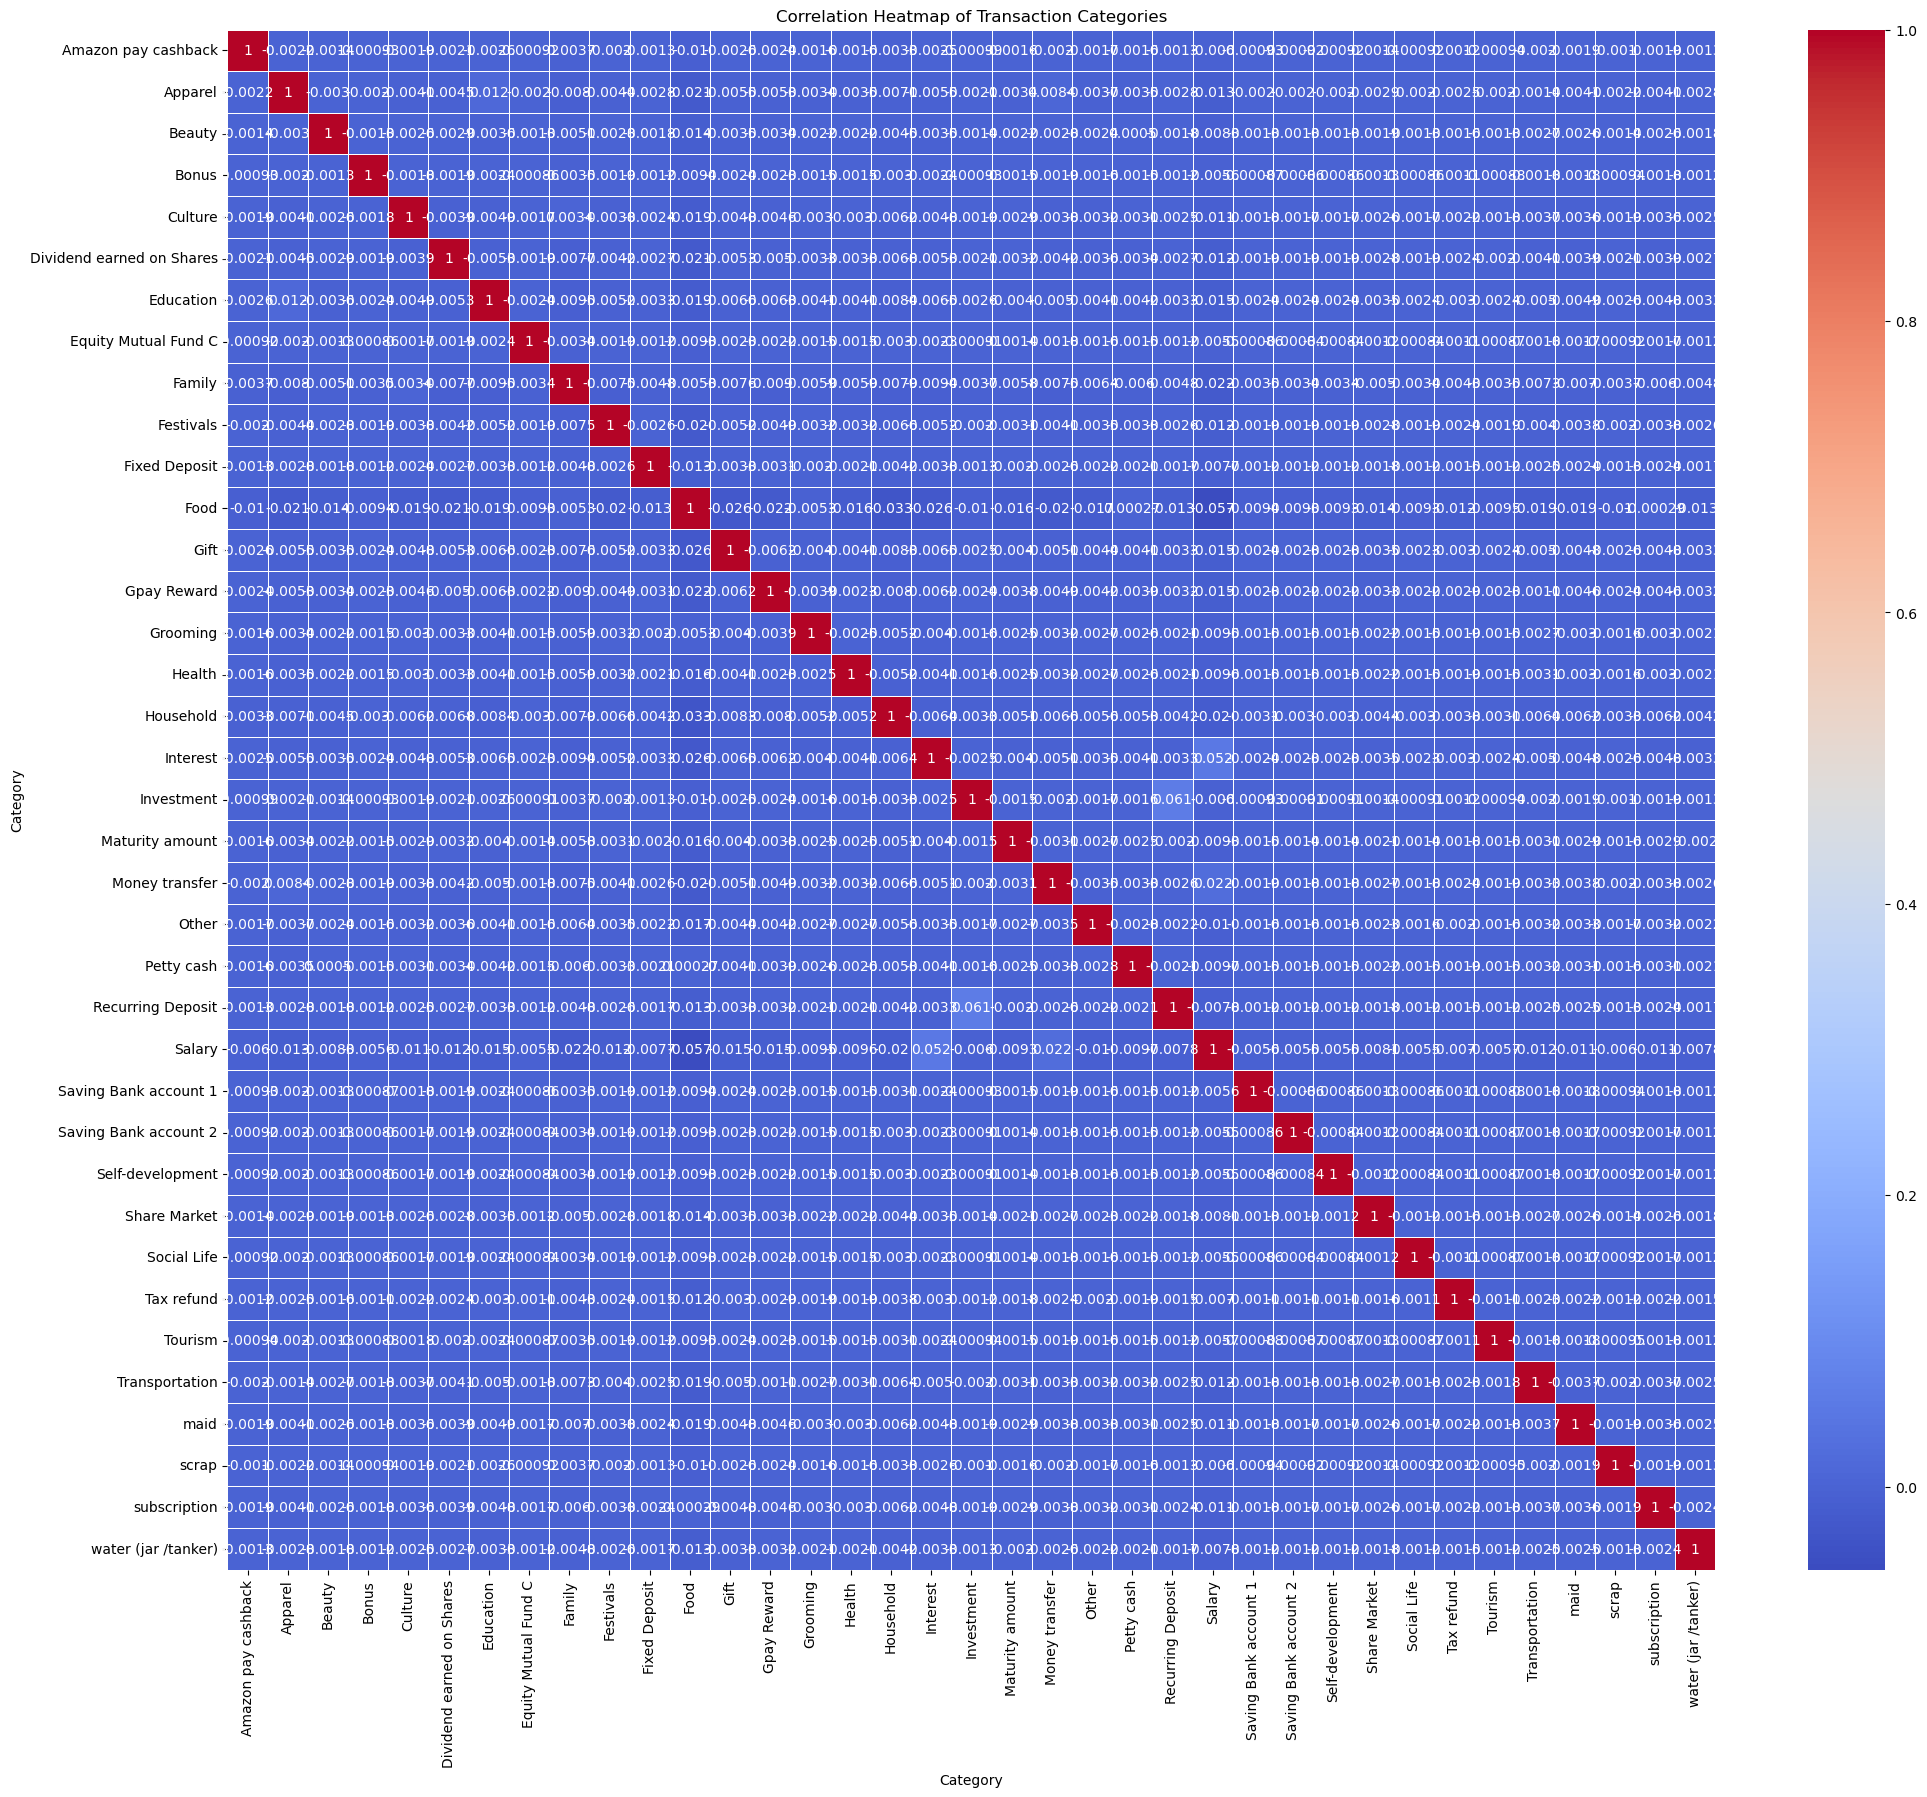

In [142]:
 plt.figure(figsize=(24,20))
 sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
 plt.title('Correlation Heatmap of Transaction Categories')
 plt.show()


 # Report
 ## Summary
 The financial transactions dataset was analyzed to identify key trends and insights. The
 data cleaning process involved handling missing values, correcting data types, and
 removing duplicates. Exploratory Data Analysis (EDA) revealed the distribution of
 transaction amounts, transaction counts by category and type, and significant patterns
 over time. Time series analysis highlighted monthly and daily transaction trends.
 Correlation analysis identified relationships between different transaction categories.
 Key Findings

● Thedistribution of transaction amounts showed a right-skewed pattern with most
 transactions clustered around lower values.
 
● Sales and Purchases were the most common transaction categories.
 
● Credit transactions were more frequent than Debit transactions.
 
● Monthly transaction trends revealed seasonal patterns with peaks in certain
 months.
 
● Correlation analysis indicated strong relationships between certain transaction
 categories.
Visualizations
 
● Distribution of Transaction Amounts
 
● Transaction Counts by Category and Type
 
● Monthly and Daily Transaction Amounts
 
● Correlation Heatmap of Transaction Categories
 This project provides valuable insights into daily financial transactions, helping to
 inform decision-making and strategic planning.
